In [1]:
%pylab inline
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 


Populating the interactive namespace from numpy and matplotlib


In [2]:
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)


In [3]:
def epi_step(A, p, n, gamma, beta):
    q = np.zeros(n)
    for i in range(n):
        z = 1
        for j in range(n):
            z = z*(1-beta*A[i,j]*p[j])
        q[i] = (1-p[i])*z+gamma*p[i]*z
    p = 1-q
    return p

In [329]:
def trial(A, gamma, beta, m, init):
    t = np.zeros(m)
    n = len(A)
    p=init #vector of zeroes
    for i in range(m):#loop updates values of t and p
        t[i] = sum(p)
        p = epi_step(A, p, n, gamma, beta)
    return t,p

In [330]:
m=40
gamma=.24
beta=.75

In [331]:
# Random initial infectivity (with mean 1)

init = np.random.rand(len(A))
init =init/sum(init)
#init[20]=1
t3,p1 = trial(A,gamma,beta,m,init)
#print(t3,p1)

In [332]:
#Remove four nodes with randomly from graph
B = A
B[:,3]=0
B[3,:]=0
B[:,30]=0
B[30,:]=0
B[:,21]=0
B[21,:]=0
B[:,41]=0
B[41,:]=0
init = np.random.rand(len(A))
init =init/sum(init)
t6,p1 = trial(B,gamma,beta,m,init)

In [7]:
# Find 4 nodes with highest betwenness centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.betweenness_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-4:n])
print(b)

[(0.2377914260002877, 94), (0.26686914321671973, 105), (0.335668207280111, 48), (0.36200035558432475, 144)]


In [334]:
#Remove four nodes with highest betwenness centrality from graph
B = A
B[:,48]=0
B[48,:]=0
B[:,105]=0
B[105,:]=0
B[:,94]=0
B[94,:]=0
B[:,117]=0
B[117,:]=0
init = np.random.rand(len(A))
init =init/sum(init)
t5,p1 = trial(B,gamma,beta,m,init)

In [335]:
# Find 4 nodes with highest degree centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.degree_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-5:n])
print(b[3][1],b[2][1],b[1][1],b[0][1])

(144, 51, 129, 93)


In [336]:
#Remove four nodes with highest degree centrality from graph
B = A
B[:,144]=0
B[144,:]=0
B[:,51]=0
B[51,:]=0
B[:,129]=0
B[129,:]=0
B[:,93]=0
B[93,:]=0
init = np.random.rand(len(A))
init =init/sum(init)
t7,p1 = trial(B,gamma,beta,m,init)

In [337]:
# Find 4 nodes with highest eigenvector centrality
G=nx.read_weighted_edgelist('Software Digital.txt')
A=nx.to_numpy_matrix(G)
G=nx.from_numpy_matrix(A)
n=len(A)
dic=nx.eigenvector_centrality(G)
a = [(dic[key], key) for key in dic]
b=(sorted(a,reverse=False)[n-4:n])
print(b[3][1],b[2][1],b[1][1],b[0][1])

(94, 144, 51, 129)


In [338]:
#Remove four nodes with highest eigenvector centrality from graph
B = A
B[:,94]=0
B[94,:]=0
B[:,144]=0
B[144,:]=0
B[:,51]=0
B[51,:]=0
B[:,129]=0
B[129,:]=0
init = np.random.rand(len(A))
init =init/sum(init)
t8,p1 = trial(B,gamma,beta,m,init)

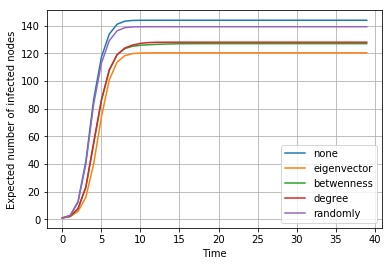

In [339]:
plt.clf()
plt.plot(range(m),t3)
plt.plot(range(m),t8)
plt.plot(range(m),t5)
plt.plot(range(m),t7)
plt.plot(range(m),t6)
plt.xlabel('Time')
plt.ylabel('Expected number of infected nodes')
plt.legend(['none','eigenvector','betwenness','degree','randomly'])
#plt.title('beta=.45 and gamma=.65 ')
plt.grid()
plt.savefig('fig48.png')